## Advanced Regression Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. 

The company is looking at prospective properties to buy to enter the market.

We are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

Objectives:

1. Which variables are significant in predicting the price of a house
2. How well those variables describe the price of a house
3. Determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 


We are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables.

### 1: Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

### 2: Inspecting the Dataframe

In [3]:
# head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check shape of housing dataframe
housing.shape

(1460, 81)

In [5]:
#Checking if there are any Duplicate rows
print(housing['Id'].nunique())

#1460 unique rows are present

1460


In [6]:
#let's look at the statistical aspects of the dataframe
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#checking type of each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

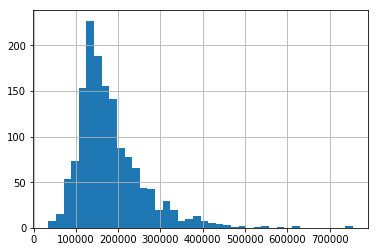

In [8]:
#Histogram of SalePrice
housing['SalePrice'].hist(bins = 40)

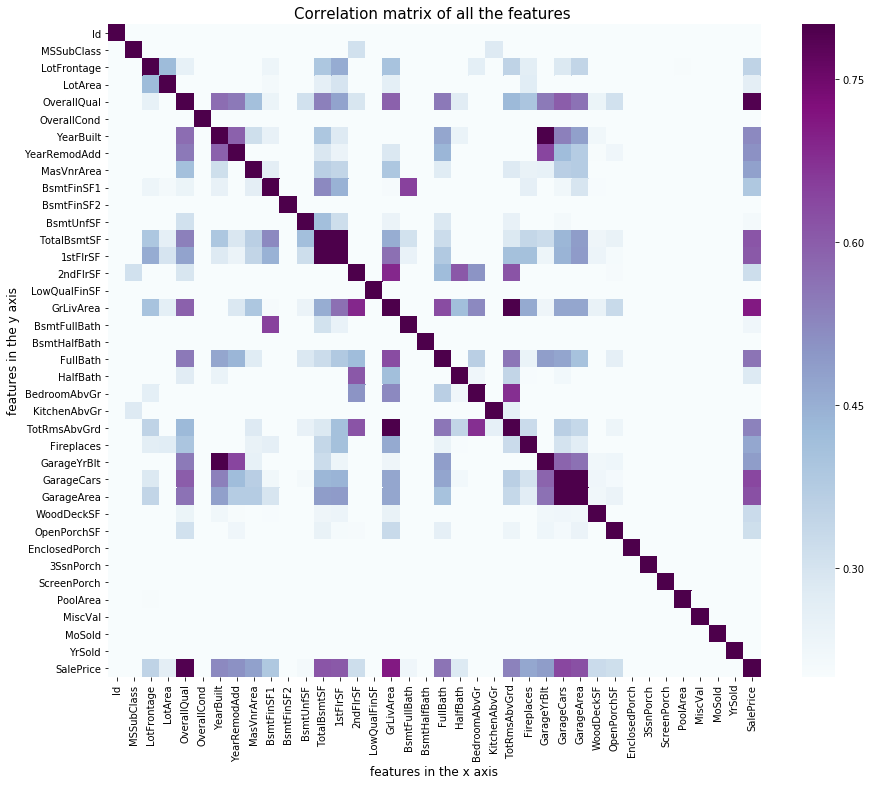

In [9]:
# Correlation Matrix all features
correlation_matrice = housing.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(correlation_matrice,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.xlabel('features in the x axis',fontsize= 12)
plt.ylabel('features in the y axis',fontsize= 12)
plt.title('Correlation matrix of all the features ', fontsize= 15);

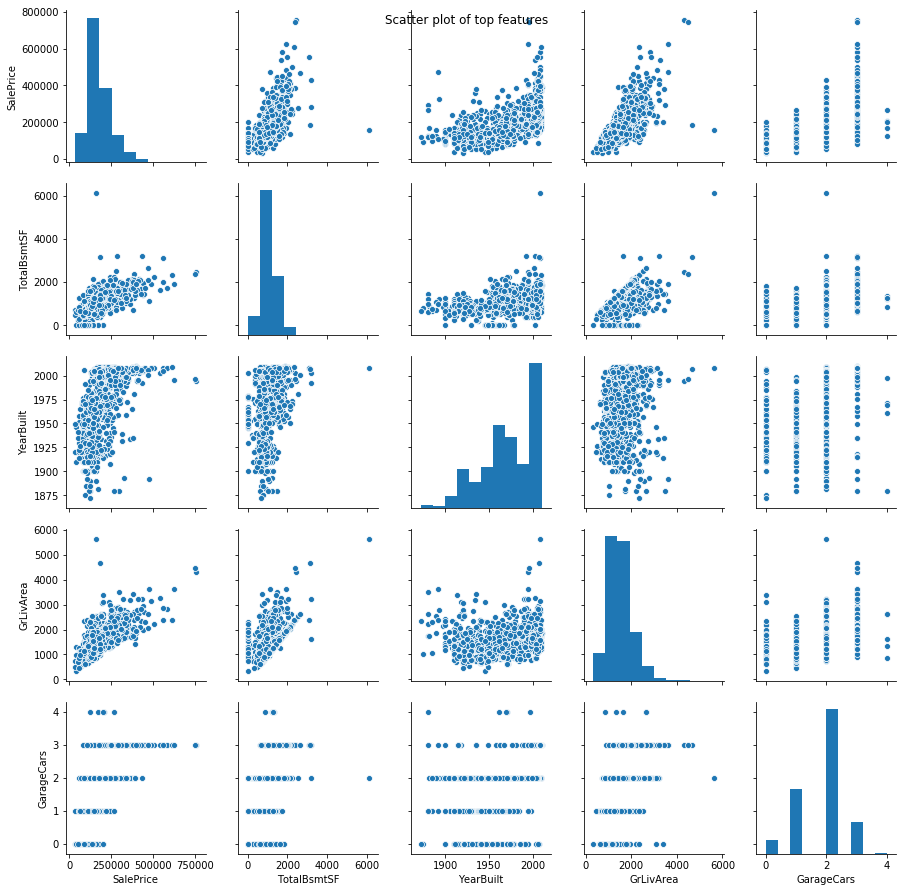

In [10]:
#Scatter plot of most important features
cols = ['SalePrice', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea', 'GarageCars']
sns.pairplot(housing[cols])
plt.suptitle('Scatter plot of top features ')
plt.show();

### 3: Data Preparation

In [11]:
col = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',  'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i in col:
    print(housing[i].astype('category').value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge   

In [12]:
#Dropping the columns which don't carry much variance. Also dropping ID as not of use.

housing = housing.drop(['Id', 'LotFrontage', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'], axis=1)

In [13]:
#significantly high values of NA. Hence dropping all these.

housing = housing.drop(['Alley', 'FireplaceQu', 'Fence', 'MiscFeature'], axis=1)

In [14]:
#Dropping variables which are of not use
housing = housing.drop(['LotShape', 'LandSlope', 'CentralAir', 'LowQualFinSF', 'BsmtHalfBath', 'GarageQual', 'GarageCond', '3SsnPorch', 'MiscVal'], axis=1)

In [15]:
housing.shape

(1460, 60)

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
LandContour      1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 no

In [17]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,2,548,0,61,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,2,460,298,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,2,608,0,42,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,3,642,0,35,272,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,3,836,192,84,0,0,0,12,2008,250000


In [18]:
# Checking the percentage of missing values
round(100*(housing_numeric.isnull().sum()/len(housing_numeric.index)), 2)

MSSubClass       0.00
LotArea          0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
MasVnrArea       0.55
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
1stFlrSF         0.00
2ndFlrSF         0.00
GrLivArea        0.00
BsmtFullBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
GarageYrBlt      5.55
GarageCars       0.00
GarageArea       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
ScreenPorch      0.00
PoolArea         0.00
MoSold           0.00
YrSold           0.00
SalePrice        0.00
dtype: float64

In [19]:
## Removing basement columns as in we already have information in TotalBsmtSF
housing_numeric = housing_numeric.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1)

In [20]:
# Age in years since house was constructed
housing_numeric['HouseAge']= 2019-housing_numeric['YearBuilt']

In [21]:
# Age in years since remodelling
housing_numeric['RemodAge']= 2019-housing_numeric['YearRemodAdd']  

In [22]:
## Removing year/month attributes as not of use
housing_numeric = housing_numeric.drop(['GarageYrBlt', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)

In [23]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
MasVnrArea       1452 non-null float64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
SalePrice        1460 non-null int64
Hou

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95%
housing_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice,HouseAge,RemodAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,1057.429452,1162.626712,346.992466,1515.463699,0.425342,...,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,2.758904,180921.195890,47.732192,34.134247
std,42.300571,9981.264932,1.382997,1.112799,181.066207,438.705324,386.587738,436.528436,525.480383,0.518911,...,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,40.177307,79442.502883,30.202904,20.645407
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,9.000000,9.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,19.000000,15.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,991.500000,1087.000000,0.000000,1464.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,46.000000,25.000000
75%,70.000000,11601.500000,7.000000,6.000000,166.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,65.000000,52.000000
90%,120.000000,14381.700000,8.000000,7.000000,335.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,...,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,278000.000000,94.100000,69.000000
95%,160.000000,17401.150000,8.000000,8.000000,456.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,...,3.000000,850.100000,335.000000,175.050000,180.150000,160.000000,0.000000,326100.000000,103.000000,69.000000
99%,190.000000,37567.640000,10.000000,9.000000,791.920000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,...,3.000000,1002.790000,505.460000,285.820000,261.050000,268.050000,0.000000,442567.010000,119.820000,69.000000


## 4. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [25]:
# split into X and y
X = housing.loc[:, ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]

y = housing['SalePrice']

In [26]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Unf,Ex,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,...,Unf,Ex,SBrkr,TA,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Unf,Ex,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,Unf,Gd,SBrkr,Gd,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Unf,Ex,SBrkr,Gd,Typ,Attchd,RFn,Y,WD,Normal


In [27]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
housing_new = pd.concat([housing_numeric, housing_dummies], axis=1)
housing_new.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,856,856,854,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,1262,1262,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,920,920,866,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,756,961,756,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,1145,1145,1053,2198,1,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# Checking the percentage of missing values
round(100*(housing_new.isnull().sum()/len(housing_new.index)), 2)

MSSubClass               0.00
LotArea                  0.00
OverallQual              0.00
OverallCond              0.00
MasVnrArea               0.55
TotalBsmtSF              0.00
1stFlrSF                 0.00
2ndFlrSF                 0.00
GrLivArea                0.00
BsmtFullBath             0.00
FullBath                 0.00
HalfBath                 0.00
BedroomAbvGr             0.00
KitchenAbvGr             0.00
TotRmsAbvGrd             0.00
Fireplaces               0.00
GarageCars               0.00
GarageArea               0.00
WoodDeckSF               0.00
OpenPorchSF              0.00
EnclosedPorch            0.00
ScreenPorch              0.00
PoolArea                 0.00
SalePrice                0.00
HouseAge                 0.00
RemodAge                 0.00
MSZoning_FV              0.00
MSZoning_RH              0.00
MSZoning_RL              0.00
MSZoning_RM              0.00
                         ... 
KitchenQual_Gd           0.00
KitchenQual_TA           0.00
Functional

In [30]:
#df = pd.DataFrame(data=housing_new, dtype=np.float64)
df = housing_new[np.isfinite(housing_new['MasVnrArea'])]

In [31]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,856,856,854,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,1262,1262,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,920,920,866,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,756,961,756,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,1145,1145,1053,2198,1,...,0,0,0,0,1,0,0,0,1,0


## 5. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [32]:
# Split the datafram into train and test sets
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=187)

In [34]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
           'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
          'HouseAge', 'RemodAge' ]

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [35]:
# Let's take a look at the train dataframe now
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
25,-0.882629,0.323787,1.377064,-0.523510,3.037013,1.221010,1.158367,-0.799004,0.181923,-0.783218,...,0,0,0,0,1,0,0,0,1,0
88,-0.178098,-0.188713,-2.251300,-3.214336,-0.567021,-0.088100,-0.376552,-0.799004,0.036448,-0.783218,...,0,0,0,0,0,0,0,0,0,0
986,-0.178098,-0.469877,-0.074281,2.167315,-0.567021,-1.338028,-0.407930,0.668795,0.250728,-0.783218,...,0,0,0,0,1,0,0,0,1,0
1444,-0.882629,-0.186044,0.651391,-0.523510,0.029897,0.880121,0.692923,-0.799004,-0.168003,-0.783218,...,0,0,0,0,1,0,0,0,1,0
1108,0.056746,-0.224926,-0.074281,-0.523510,-0.567021,-0.298789,-0.546517,0.918830,0.358851,-0.783218,...,0,0,0,0,1,0,0,0,0,0


In [36]:
# Split the train dataset into X and y

y_train = df_train.pop('SalePrice')
X_train = df_train

## 6. Model Building and Evaluation

In [37]:
# Instantiate LInear Regression using RFE
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-5.13514996e-02  5.52320656e-02  1.25622285e-01  8.63847415e-02
  2.46387276e-02  1.43203268e-01  1.44692964e-01  2.62107000e-01
  3.31435501e-02  5.93082385e-02  4.04977638e-02  3.78553572e-02
 -3.58678360e-02 -5.30459204e-02  6.74296373e-02  3.31594319e-02
  7.25588458e-02  1.42337548e-02  2.29415396e-02 -1.52863259e-02
  1.14843893e-03 -4.42711400e-03  5.03983690e-02 -9.14706508e-02
 -3.33617024e-02  6.27999051e-01  4.42784013e-01  4.66668014e-01
  4.22733922e-01  1.57511190e-01  4.41727517e-02  1.21383961e-01
  1.19807316e-01 -1.14362603e-01 -3.11386667e-01 -3.36464769e-02
  5.95319834e-02  1.90012875e-01  1.75409348e-01  8.94009407e-02
  7.50509915e-02  4.35186063e-01 -6.73550986e-02  4.98843402e-02
  1.08845232e-01  2.35067680e-01 -5.25833131e-02  2.53825191e-03
  3.07919970e-01 -1.71278149e-02  6.77040387e-01  4.04017737e-01
  6.28098301e-03  1.36962911e-01  4.02333697e-02  1.63027773e-01
  1.97499089e-01  7.36886918e-01  9.59513722e-03  3.34832703e-01
  3.97510071e-02  1.34787

#### Model Building Using RFE

In [39]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 25 features
lm = LinearRegression()
rfe1 = RFE(lm, 25)

# Fit with 25 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False False False  True False False
 False False False  True False False False False False  True False False
 False False False False False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False  True False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False  True
  True  True False False False False  True  True Fa

#### Model Building and Evaluation 
​
Let's now check the summary of this model using `statsmodels`.

In [40]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 25 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,1stFlrSF,2ndFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,...,ExterCond_TA,BsmtExposure_Gd,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Sev,Functional_Typ,SaleType_Con,SaleType_New,SaleCondition_Partial
25,1.0,1.158367,-0.799004,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
88,1.0,-0.376552,-0.799004,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
986,1.0,-0.407930,0.668795,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1444,1.0,0.692923,-0.799004,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1108,1.0,-0.546517,0.918830,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [41]:
# Fitting the model with 25 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:24   Log-Likelihood:                -563.64
No. Observations:                1016   AIC:                             1179.
Df Residuals:                     990   BIC:                             1307.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,569.34
25,SaleCondition_Partial,40.12
24,SaleType_New,40.08
16,ExterCond_TA,38.08
15,ExterCond_Gd,33.28
5,MSZoning_RL,29.51
6,MSZoning_RM,23.29
3,MSZoning_FV,8.16
14,ExterCond_Fa,7.01
20,KitchenQual_TA,6.83


In [44]:
X_train_new = X_train_rfe1.drop('SaleCondition_Partial', axis = 1)
# Refitting with 24 variables

In [45]:
# Fitting the model with 24 variables
import statsmodels.api as sm2
X_train_lm2 = sm2.add_constant(X_train_new)

lm2 = sm2.OLS(y_train, X_train_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -565.77
No. Observations:                1016   AIC:                             1182.
Df Residuals:                     991   BIC:                             1305.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0319 

In [46]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,569.15
16,ExterCond_TA,38.08
15,ExterCond_Gd,33.28
5,MSZoning_RL,29.51
6,MSZoning_RM,23.29
3,MSZoning_FV,8.16
14,ExterCond_Fa,7.01
20,KitchenQual_TA,6.76
19,KitchenQual_Gd,5.48
4,MSZoning_RH,3.20


In [47]:
X_train_new = X_train_new.drop('ExterCond_TA', axis = 1)

In [48]:
# Fitting the model with 23 variables
import statsmodels.api as sm3
X_train_lm3 = sm3.add_constant(X_train_new)

lm3 = sm3.OLS(y_train, X_train_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -567.68
No. Observations:                1016   AIC:                             1183.
Df Residuals:                     992   BIC:                             1302.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5129 

In [49]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,223.69
5,MSZoning_RL,29.51
6,MSZoning_RM,23.28
3,MSZoning_FV,8.16
19,KitchenQual_TA,6.76
18,KitchenQual_Gd,5.48
4,MSZoning_RH,3.20
1,1stFlrSF,1.79
17,KitchenQual_Fa,1.56
8,Neighborhood_NridgHt,1.42


In [50]:
X_train_new = X_train_new.drop('MSZoning_RL', axis = 1)

In [51]:
# Fitting the model with 22 variables
import statsmodels.api as sm4
X_train_lm4 = sm4.add_constant(X_train_new)

lm4 = sm4.OLS(y_train, X_train_lm4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -574.31
No. Observations:                1016   AIC:                             1195.
Df Residuals:                     993   BIC:                             1308.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1400 

In [52]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.48
18,KitchenQual_TA,6.76
17,KitchenQual_Gd,5.48
1,1stFlrSF,1.79
16,KitchenQual_Fa,1.52
7,Neighborhood_NridgHt,1.42
2,2ndFlrSF,1.30
22,SaleType_New,1.24
6,Neighborhood_NoRidge,1.19
3,MSZoning_FV,1.16


In [53]:
X_train_new = X_train_new.drop('KitchenQual_TA', axis = 1)

In [54]:
# Fitting the model with 21 variables
import statsmodels.api as sm5
X_train_lm5 = sm5.add_constant(X_train_new)

lm5 = sm5.OLS(y_train, X_train_lm5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -634.82
No. Observations:                1016   AIC:                             1314.
Df Residuals:                     994   BIC:                             1422.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6132 

In [55]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.76
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
17,KitchenQual_Gd,1.21
21,SaleType_New,1.21
6,Neighborhood_NoRidge,1.19
5,MSZoning_RM,1.15
3,MSZoning_FV,1.15
15,BsmtExposure_Gd,1.11


In [56]:
X_train_new = X_train_new.drop('ExterCond_Gd', axis = 1)

In [57]:
# Fitting the model with 20 variables
import statsmodels.api as sm6
X_train_lm6 = sm6.add_constant(X_train_new)

lm6 = sm6.OLS(y_train, X_train_lm6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -635.01
No. Observations:                1016   AIC:                             1312.
Df Residuals:                     995   BIC:                             1415.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6140 

In [58]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.75
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
16,KitchenQual_Gd,1.21
20,SaleType_New,1.21
6,Neighborhood_NoRidge,1.19
3,MSZoning_FV,1.15
5,MSZoning_RM,1.13
14,BsmtExposure_Gd,1.11


In [59]:
X_train_new = X_train_new.drop('SaleType_Con', axis = 1)

In [60]:
# Fitting the model with 19 variables
import statsmodels.api as sm7
X_train_lm7 = sm7.add_constant(X_train_new)

lm7 = sm7.OLS(y_train, X_train_lm7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     203.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -636.79
No. Observations:                1016   AIC:                             1314.
Df Residuals:                     996   BIC:                             1412.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6148 

In [61]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.75
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
16,KitchenQual_Gd,1.21
19,SaleType_New,1.21
6,Neighborhood_NoRidge,1.18
3,MSZoning_FV,1.14
5,MSZoning_RM,1.13
14,BsmtExposure_Gd,1.11


In [62]:
X_train_new = X_train_new.drop('RoofStyle_Shed', axis = 1)

In [63]:
# Fitting the model with 18 variables
import statsmodels.api as sm8
X_train_lm8 = sm8.add_constant(X_train_new)

lm8 = sm8.OLS(y_train, X_train_lm8).fit()   
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -637.25
No. Observations:                1016   AIC:                             1312.
Df Residuals:                     997   BIC:                             1406.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6152 

In [64]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.75
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
18,SaleType_New,1.21
15,KitchenQual_Gd,1.20
6,Neighborhood_NoRidge,1.18
3,MSZoning_FV,1.14
5,MSZoning_RM,1.13
13,BsmtExposure_Gd,1.10


In [65]:
X_train_new = X_train_new.drop('Exterior1st_CBlock', axis = 1)

In [66]:
# Fitting the model with 17 variables
import statsmodels.api as sm9
X_train_lm9 = sm9.add_constant(X_train_new)

lm9 = sm9.OLS(y_train, X_train_lm9).fit()   
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:25   Log-Likelihood:                -638.02
No. Observations:                1016   AIC:                             1312.
Df Residuals:                     998   BIC:                             1401.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6160 

In [67]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.74
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
17,SaleType_New,1.21
14,KitchenQual_Gd,1.20
6,Neighborhood_NoRidge,1.18
3,MSZoning_FV,1.14
5,MSZoning_RM,1.13
12,BsmtExposure_Gd,1.10


In [68]:
X_train_new = X_train_new.drop('KitchenQual_Fa', axis = 1)

In [69]:
# Fitting the model with 16 variables
import statsmodels.api as sm10
X_train_lm10 = sm10.add_constant(X_train_new)

lm10 = sm10.OLS(y_train, X_train_lm10).fit()   
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:09:26   Log-Likelihood:                -639.94
No. Observations:                1016   AIC:                             1314.
Df Residuals:                     999   BIC:                             1398.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6247 

In [70]:
#Calculating the VIF again

vif = pd.DataFrame()
X = X_train_lm10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.65
1,1stFlrSF,1.61
2,2ndFlrSF,1.24
7,Neighborhood_NridgHt,1.23
16,SaleType_New,1.21
13,KitchenQual_Gd,1.20
6,Neighborhood_NoRidge,1.18
3,MSZoning_FV,1.14
5,MSZoning_RM,1.13
12,BsmtExposure_Gd,1.10


In [71]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [72]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Functional_Typ,2.52
12,KitchenQual_Gd,2.02
0,1stFlrSF,1.59
15,SaleType_New,1.32
6,Neighborhood_NridgHt,1.30
4,MSZoning_RM,1.26
1,2ndFlrSF,1.24
5,Neighborhood_NoRidge,1.22
11,BsmtExposure_Gd,1.21
2,MSZoning_FV,1.18


In [73]:
y_train_price = lm10.predict(X_train_lm10)

Text(0.5,0,'Errors')

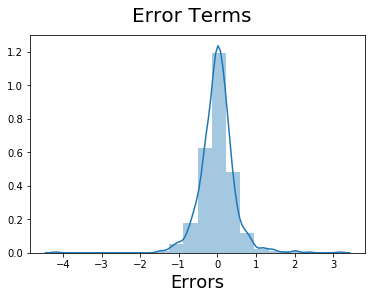

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [75]:
num_vars = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
           'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
           'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 
             'HouseAge', 'RemodAge', 'SalePrice']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
#Split test dataset into X and Y - X_test and Y_test
X_test = df_test
Y_test = df_test.pop('SalePrice')

In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm10.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm10.predict(X_test_new)

Text(0,0.5,'y_pred')

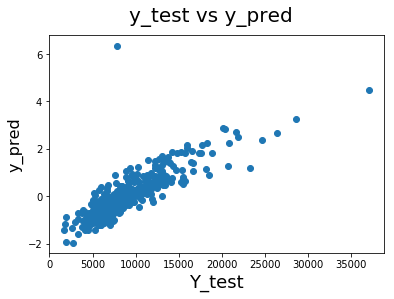

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Lasso

In [86]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [87]:
# Best alpha value for our data
model_cv.best_params_

{'alpha': 0.001}

In [88]:
model_cv.cv_results_

{'mean_fit_time': array([0.06200023, 0.03442006, 0.02932987, 0.01422067, 0.0104691 ,
        0.01603842, 0.00576177, 0.00999141, 0.00943365, 0.00832715,
        0.00812645, 0.01317239, 0.00700135, 0.00936065, 0.00826411,
        0.00756617, 0.00974674, 0.01389108, 0.01100159, 0.01204066,
        0.01205382, 0.00967684, 0.00464096, 0.01246481, 0.01433311,
        0.01411843, 0.00940995, 0.01143622]),
 'std_fit_time': array([0.03339691, 0.01435384, 0.0332505 , 0.00478282, 0.00677212,
        0.00183691, 0.01053485, 0.00319126, 0.00305952, 0.00512937,
        0.00377522, 0.00506482, 0.00135863, 0.00126366, 0.00167858,
        0.00249014, 0.0058192 , 0.00524263, 0.0055759 , 0.00352456,
        0.00851986, 0.0079881 , 0.00256291, 0.00329604, 0.00699273,
        0.00452921, 0.00779378, 0.00867925]),
 'mean_score_time': array([0.00000000e+00, 0.00000000e+00, 2.13570595e-03, 3.15556526e-03,
        5.05828857e-04, 3.60584259e-04, 0.00000000e+00, 1.77288055e-03,
        8.32653046e-04, 2.877807

In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062000,0.033397,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.260830,-0.232234,-0.248112,-0.216782,...,-0.236711,0.015854,2,-0.160412,-0.186524,-0.182750,-0.189791,-0.185265,-0.180948,0.010516
1,0.034420,0.014354,0.000000,0.000000,0.001,{'alpha': 0.001},-0.238585,-0.209067,-0.224249,-0.198165,...,-0.215955,0.014049,1,-0.174870,-0.193059,-0.188878,-0.192534,-0.189157,-0.187700,0.006636
2,0.029330,0.033251,0.002136,0.003788,0.01,{'alpha': 0.01},-0.273480,-0.229886,-0.233108,-0.219791,...,-0.241118,0.018765,3,-0.219862,-0.233110,-0.228770,-0.232853,-0.227477,-0.228414,0.004815
3,0.014221,0.004783,0.003156,0.006311,0.05,{'alpha': 0.05},-0.304325,-0.269851,-0.287214,-0.267281,...,-0.282420,0.013358,4,-0.268538,-0.280246,-0.275852,-0.280514,-0.274526,-0.275935,0.004388
4,0.010469,0.006772,0.000506,0.000642,0.1,{'alpha': 0.1},-0.322358,-0.288598,-0.309384,-0.287186,...,-0.300297,0.013572,5,-0.289172,-0.297394,-0.295484,-0.300649,-0.295492,-0.295638,0.003743


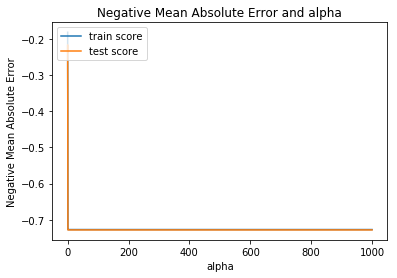

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
lasso.coef_

array([-0.07608773,  0.05303912,  0.14820704,  0.09296533,  0.04186458,
        0.15121446,  0.14296474,  0.2283494 ,  0.02875994,  0.05866875,
        0.03347172,  0.03718218, -0.03502406, -0.05231931,  0.07105297,
        0.03487108,  0.05840921,  0.01963931,  0.02788663, -0.01001729,
        0.00241077, -0.        ,  0.05144957, -0.09114439, -0.03285676,
        0.14385653,  0.        ,  0.04160633, -0.00473712,  0.0845521 ,
        0.        ,  0.07307582,  0.11466191, -0.04139935, -0.        ,
       -0.01424525, -0.        ,  0.        ,  0.0893581 ,  0.        ,
        0.        ,  0.32956404, -0.10368024, -0.00647245, -0.        ,
        0.        , -0.0847898 , -0.03335702,  0.        , -0.0640649 ,
        0.56713605,  0.33551257, -0.02617978,  0.        , -0.        ,
        0.03655769,  0.10903957,  0.54098523, -0.        ,  0.1267331 ,
        0.        ,  0.11141005,  0.        , -0.13542463, -0.0164306 ,
        0.        , -0.        ,  0.        ,  0.08946122, -0.01

In [ ]:
#new = pd.Series(lasso.coef_, index=X_train.columns)

In [93]:
# Creating list for lassso coefficient
lasso_coef = np.array(lasso.coef_).tolist()

In [94]:
lasso_coef

[-0.07608772616022288,
 0.053039116468447695,
 0.14820704322420325,
 0.09296532652751206,
 0.04186458184724445,
 0.1512144597526948,
 0.14296473879349966,
 0.2283493954073203,
 0.02875993716401158,
 0.058668745253096316,
 0.033471719206747186,
 0.037182183803335114,
 -0.035024055395878176,
 -0.05231930936288048,
 0.07105297239394189,
 0.03487107735992708,
 0.058409208862703815,
 0.019639305425435544,
 0.027886633047385624,
 -0.010017291126181755,
 0.002410772096077324,
 -0.0,
 0.051449569714049674,
 -0.09114438715957789,
 -0.0328567641186737,
 0.14385653409884858,
 0.0,
 0.041606334444327944,
 -0.004737118899304899,
 0.08455209850743985,
 0.0,
 0.07307581597205044,
 0.11466191209085162,
 -0.04139934651416186,
 -0.0,
 -0.014245245976171965,
 -0.0,
 0.0,
 0.0893581041581553,
 0.0,
 0.0,
 0.32956403997600137,
 -0.1036802397228032,
 -0.00647244721952183,
 -0.0,
 0.0,
 -0.08478979932011607,
 -0.03335702229650253,
 0.0,
 -0.06406489901536377,
 0.5671360454441134,
 0.3355125679032996,
 -0.026

In [96]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
25,-0.882629,0.323787,1.377064,-0.523510,3.037013,1.221010,1.158367,-0.799004,0.181923,-0.783218,...,0,0,0,0,1,0,0,0,1,0
88,-0.178098,-0.188713,-2.251300,-3.214336,-0.567021,-0.088100,-0.376552,-0.799004,0.036448,-0.783218,...,0,0,0,0,0,0,0,0,0,0
986,-0.178098,-0.469877,-0.074281,2.167315,-0.567021,-1.338028,-0.407930,0.668795,0.250728,-0.783218,...,0,0,0,0,1,0,0,0,1,0
1444,-0.882629,-0.186044,0.651391,-0.523510,0.029897,0.880121,0.692923,-0.799004,-0.168003,-0.783218,...,0,0,0,0,1,0,0,0,1,0
1108,0.056746,-0.224926,-0.074281,-0.523510,-0.567021,-0.298789,-0.546517,0.918830,0.358851,-0.783218,...,0,0,0,0,1,0,0,0,0,0


In [98]:
#Creating X_train to list
X_train_col = list(X_train.columns.values)

In [99]:
X_train_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'HouseAge',
 'RemodAge',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Ne

In [100]:
# Creaing new variable mapped from two list - lasso_coef and X_train
mapped = zip(lasso_coef, X_train_col)

In [101]:
# Converting mapped to list
mapped = list(mapped)

In [102]:
mapped

[(-0.07608772616022288, 'MSSubClass'),
 (0.053039116468447695, 'LotArea'),
 (0.14820704322420325, 'OverallQual'),
 (0.09296532652751206, 'OverallCond'),
 (0.04186458184724445, 'MasVnrArea'),
 (0.1512144597526948, 'TotalBsmtSF'),
 (0.14296473879349966, '1stFlrSF'),
 (0.2283493954073203, '2ndFlrSF'),
 (0.02875993716401158, 'GrLivArea'),
 (0.058668745253096316, 'BsmtFullBath'),
 (0.033471719206747186, 'FullBath'),
 (0.037182183803335114, 'HalfBath'),
 (-0.035024055395878176, 'BedroomAbvGr'),
 (-0.05231930936288048, 'KitchenAbvGr'),
 (0.07105297239394189, 'TotRmsAbvGrd'),
 (0.03487107735992708, 'Fireplaces'),
 (0.058409208862703815, 'GarageCars'),
 (0.019639305425435544, 'GarageArea'),
 (0.027886633047385624, 'WoodDeckSF'),
 (-0.010017291126181755, 'OpenPorchSF'),
 (0.002410772096077324, 'EnclosedPorch'),
 (-0.0, 'ScreenPorch'),
 (0.051449569714049674, 'PoolArea'),
 (-0.09114438715957789, 'HouseAge'),
 (-0.0328567641186737, 'RemodAge'),
 (0.14385653409884858, 'MSZoning_FV'),
 (0.0, 'MSZoni

In [103]:
# Converting mapped list to dataframe
df_mapped = pd.DataFrame(mapped)

In [104]:
# Mapped dataframe O/P
df_mapped

,0,1
0,-0.076088,MSSubClass
1,0.053039,LotArea
2,0.148207,OverallQual
3,0.092965,OverallCond
4,0.041865,MasVnrArea
5,0.151214,TotalBsmtSF
6,0.142965,1stFlrSF
7,0.228349,2ndFlrSF
8,0.028760,GrLivArea
9,0.058669,BsmtFullBath


In [105]:
# Dropping rows which have 0 values
df_lasso_mapped = df_mapped.loc[df_mapped[0] != 0.0]

## Variables which are significant in predicting the price of a house

In [106]:
df_lasso_mapped[1]

0                MSSubClass
1                   LotArea
2               OverallQual
3               OverallCond
4                MasVnrArea
5               TotalBsmtSF
6                  1stFlrSF
7                  2ndFlrSF
8                 GrLivArea
9              BsmtFullBath
10                 FullBath
11                 HalfBath
12             BedroomAbvGr
13             KitchenAbvGr
14             TotRmsAbvGrd
15               Fireplaces
16               GarageCars
17               GarageArea
18               WoodDeckSF
19              OpenPorchSF
20            EnclosedPorch
22                 PoolArea
23                 HouseAge
24                 RemodAge
25              MSZoning_FV
27              MSZoning_RL
28              MSZoning_RM
29          LandContour_HLS
31          LandContour_Lvl
32        LotConfig_CulDSac
               ...         
123       Foundation_CBlock
124        Foundation_PConc
128             BsmtQual_Fa
129             BsmtQual_Gd
130             Bsmt

In [107]:
#Lasso on Test data

model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_test, Y_test) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [108]:
model_cv1.best_params_

{'alpha': 20}

In [109]:
model_cv1.cv_results_

{'mean_fit_time': array([0.05265827, 0.05504146, 0.07282343, 0.07545757, 0.0810308 ,
        0.09923019, 0.04993863, 0.06705732, 0.09294567, 0.09897571,
        0.08680191, 0.08280702, 0.07789154, 0.07594123, 0.0436223 ,
        0.03979182, 0.03643646, 0.03634214, 0.02987485, 0.02683067,
        0.02348914, 0.02250438, 0.02006631, 0.01990757, 0.00671825,
        0.00653615, 0.0101768 , 0.00278125]),
 'std_fit_time': array([0.00910692, 0.01112822, 0.02183167, 0.01368429, 0.00443048,
        0.00907404, 0.01224663, 0.01583644, 0.01173085, 0.01864003,
        0.01582372, 0.01856735, 0.02305207, 0.01980887, 0.0234373 ,
        0.0173798 , 0.01250292, 0.0129217 , 0.01209525, 0.00775575,
        0.00746769, 0.00834781, 0.00812237, 0.01517496, 0.00822815,
        0.00801571, 0.00843197, 0.0055625 ]),
 'mean_score_time': array([0.        , 0.00043321, 0.00040989, 0.00028887, 0.00051084,
        0.00019679, 0.        , 0.00021687, 0.00019999, 0.00020022,
        0.00317326, 0.00026126, 0.      

In [110]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052658,0.009107,0.000000,0.000000,0.0001,{'alpha': 0.0001},-1613.076710,-1792.275085,-3226.134147,-1619.983299,...,-2036.172687,605.960707,28,-671.056403,-754.199681,-592.935757,-760.205637,-593.991521,-674.477800,73.271676
1,0.055041,0.011128,0.000433,0.000533,0.001,{'alpha': 0.001},-1599.425265,-1789.343890,-3221.340851,-1616.593659,...,-2030.666404,606.809629,27,-671.372170,-754.239173,-593.243189,-760.830658,-594.721212,-674.881280,73.195217
2,0.072823,0.021832,0.000410,0.000502,0.01,{'alpha': 0.01},-1574.011775,-1773.836761,-3211.370189,-1605.176703,...,-2014.713179,609.917944,26,-672.979560,-757.174904,-597.507388,-763.147963,-596.376284,-677.437220,73.053342
3,0.075458,0.013684,0.000289,0.000395,0.05,{'alpha': 0.05},-1566.344612,-1752.238900,-3143.186172,-1589.822907,...,-1983.862086,589.521185,25,-673.016409,-757.354315,-597.385344,-763.557275,-595.602349,-677.383138,73.386898
4,0.081031,0.004430,0.000511,0.000449,0.1,{'alpha': 0.1},-1556.034131,-1734.141300,-3091.051605,-1570.677801,...,-1956.643552,575.925907,24,-673.520478,-758.233364,-597.860251,-764.658152,-594.956975,-677.845844,73.872185


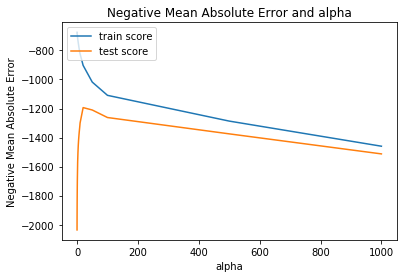

In [111]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [112]:
alpha = 20

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_test, Y_test) 

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
# Calculating train and test scores on lasso regression
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso1.score(X_test, Y_test)

In [114]:
# output of train and test scores of lasso
# How well those lasso variables describe the price of a house
lasso_train_score, lasso_test_score

(0.9048764579910665, 0.8673865848248852)

## Ridge Regression

In [115]:
# list of alphas to tune
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [116]:
model_cv.best_params_

{'alpha': 10.0}

In [118]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003730,0.005792,0.001047,0.001609,0.0001,{'alpha': 0.0001},-0.268879,-0.243041,-0.259083,-0.225456,...,-0.246570,0.015618,26,-0.158849,-0.185712,-0.182803,-0.189390,-0.185058,-0.180362,0.010963
1,0.009972,0.008212,0.000000,0.000000,0.001,{'alpha': 0.001},-0.268840,-0.242963,-0.259032,-0.225410,...,-0.246518,0.015621,25,-0.158851,-0.185711,-0.182800,-0.189389,-0.185056,-0.180362,0.010962
2,0.008243,0.007315,0.000199,0.000399,0.01,{'alpha': 0.01},-0.268460,-0.242251,-0.258536,-0.224976,...,-0.246027,0.015639,24,-0.158884,-0.185719,-0.182772,-0.189385,-0.185034,-0.180359,0.010946
3,0.003349,0.006698,0.000000,0.000000,0.05,{'alpha': 0.05},-0.266907,-0.239931,-0.256527,-0.223403,...,-0.244191,0.015634,23,-0.159074,-0.185801,-0.182713,-0.189354,-0.184977,-0.180384,0.010867
4,0.006481,0.007944,0.000000,0.000000,0.1,{'alpha': 0.1},-0.265285,-0.237879,-0.254375,-0.221819,...,-0.242348,0.015590,22,-0.159391,-0.185851,-0.182675,-0.189304,-0.184965,-0.180438,0.010737


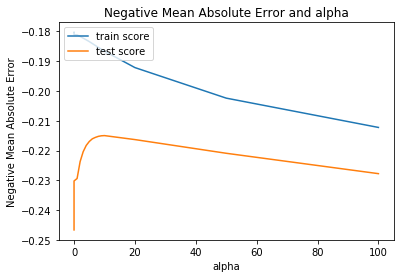

In [119]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [120]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.53204617e-02,  5.32981200e-02,  1.59412699e-01,  9.30636876e-02,
        5.38015837e-02,  1.44752964e-01,  9.29461537e-02,  1.69659316e-01,
        1.10877724e-01,  6.12596202e-02,  3.68985371e-02,  4.17089205e-02,
       -4.02085824e-02, -5.17471434e-02,  6.47926845e-02,  3.38868782e-02,
        6.30065644e-02,  2.36876976e-02,  2.73979093e-02, -1.14125271e-02,
        4.13932627e-03, -1.90129324e-04,  5.32698202e-02, -9.11303130e-02,
       -3.22158326e-02,  1.07469615e-01,  1.78909803e-02,  4.74081530e-02,
       -2.02798453e-02,  1.13582925e-01, -8.11937576e-03,  7.73420294e-02,
        1.08237917e-01, -6.62756629e-02, -5.54548568e-02, -2.67921887e-02,
       -2.46810463e-02, -5.41163728e-03,  5.64345330e-02, -3.85387621e-02,
       -7.93623693e-02,  2.13300952e-01, -1.48730758e-01, -1.03457697e-01,
       -4.34214960e-02,  9.49894912e-03, -1.36720927e-01, -1.01850768e-01,
        2.48212328e-02, -1.34295513e-01,  3.43227705e-01,  2.12959091e-01,
       -7.91814209e-02, -

In [122]:
# Ridge Regression on Test data

model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_test, Y_test) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [123]:
model_cv1.best_params_

{'alpha': 100}

In [124]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1 = cv_results1[cv_results1['param_alpha']<=200]
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005581,0.006155,0.000305,0.000610,0.0001,{'alpha': 0.0001},-1567.878326,-1862.301127,-3198.050332,-1627.389760,...,-2027.465644,597.809692,28,-673.184736,-753.907360,-597.430334,-761.861578,-596.136311,-676.504064,72.110781
1,0.003347,0.006695,0.000200,0.000401,0.001,{'alpha': 0.001},-1566.537684,-1856.257173,-3151.055080,-1623.851119,...,-2014.895808,580.702876,27,-673.154737,-753.941242,-597.488933,-761.963742,-596.095966,-676.528924,72.138674
2,0.006274,0.007685,0.000000,0.000000,0.01,{'alpha': 0.01},-1557.417282,-1807.745611,-2769.197809,-1596.628608,...,-1913.014085,441.699824,26,-672.706721,-754.297206,-603.036603,-762.443582,-595.336614,-677.564145,71.318718
3,0.002825,0.005166,0.000000,0.000000,0.05,{'alpha': 0.05},-1522.060560,-1686.310421,-2046.694777,-1530.291881,...,-1700.150658,190.315376,25,-673.195334,-759.505578,-648.322275,-766.856793,-595.628938,-688.701784,65.810169
4,0.006497,0.007966,0.000203,0.000406,0.1,{'alpha': 0.1},-1489.167156,-1595.388016,-1752.688260,-1483.782179,...,-1592.171746,100.524433,24,-675.439476,-762.506323,-689.649493,-771.148195,-598.570167,-699.462731,63.191813


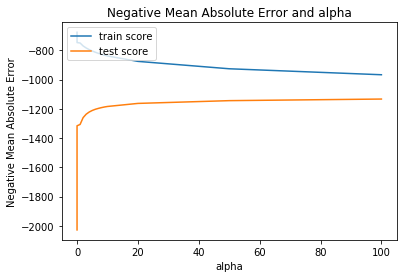

In [125]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [127]:
alpha = 100
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_test, Y_test)
ridge1.coef_

array([-2.56215891e+02,  9.65564714e+01,  8.12267662e+02,  1.92071872e+02,
        3.42065222e+02, -1.27284844e+01,  2.75424529e+02,  3.25225936e+02,
        4.90269859e+02,  9.98240181e+01,  3.47999599e+02,  4.87975862e+00,
       -1.52559536e+02, -1.53994079e+02,  3.59810697e+02,  2.48707196e+02,
        4.11704117e+02,  2.02576101e+02,  2.06663091e+02,  4.54459558e+01,
       -7.24669191e+01,  2.19652321e+02, -1.81077285e+02, -1.81714303e-01,
       -2.20132034e+02,  3.29850341e+01, -7.18629980e+00,  1.29546435e+02,
       -1.22132351e+02,  7.91091240e+01,  5.12138503e+01,  3.94411706e+01,
        2.41310314e+02, -4.86085152e+01, -1.45279530e+01, -3.29300811e+01,
        0.00000000e+00, -1.08259165e+01,  1.59135999e+00, -3.21827737e+00,
       -6.29978984e+01,  8.77106572e+01, -1.72120949e+02, -8.84684743e+01,
       -5.30551922e+01,  2.09922659e+00, -2.31973240e+01, -1.40608334e+02,
       -6.05567907e+00, -7.15665334e+01,  1.57291080e+02,  2.25205098e+02,
       -5.13035776e+01, -

In [129]:
# Calculating test and trains score on ridge
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge1.score(X_test, Y_test)

In [130]:
# output of train and test scores of lasso
# How well those ridge variables describe the price of a house
ridge_train_score, ridge_test_score

(0.9045544322822087, 0.8335213472934316)

## Conclusions

## Variables which are significant in predicting the price of a house

In [131]:
df_lasso_mapped[1]

0                MSSubClass
1                   LotArea
2               OverallQual
3               OverallCond
4                MasVnrArea
5               TotalBsmtSF
6                  1stFlrSF
7                  2ndFlrSF
8                 GrLivArea
9              BsmtFullBath
10                 FullBath
11                 HalfBath
12             BedroomAbvGr
13             KitchenAbvGr
14             TotRmsAbvGrd
15               Fireplaces
16               GarageCars
17               GarageArea
18               WoodDeckSF
19              OpenPorchSF
20            EnclosedPorch
22                 PoolArea
23                 HouseAge
24                 RemodAge
25              MSZoning_FV
27              MSZoning_RL
28              MSZoning_RM
29          LandContour_HLS
31          LandContour_Lvl
32        LotConfig_CulDSac
               ...         
123       Foundation_CBlock
124        Foundation_PConc
128             BsmtQual_Fa
129             BsmtQual_Gd
130             Bsmt

## How well those variables describe the price of a house

In [135]:
# Accuracy for lasso model
lasso_train_score, lasso_test_score

(0.9048764579910665, 0.8673865848248852)

In [134]:
# Accuracy for Ridge model
ridge_train_score, ridge_test_score

(0.9045544322822087, 0.8335213472934316)

### Optimal value of lambda
### For Lasso : Train: 0.001   Test: 20
### For Ridge : Train: 10      Test: 100